# Gathering Data

In [154]:
import pandas as pd
import requests
import os
import tweepy
import timeit
import json
import numpy as np
import matplotlib.pyplot as plt


consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [2]:
twitterdf1 = pd.read_csv("/Users/lairdhiles/Downloads/twitter-archive-enhanced.csv")

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url, allow_redirects=True)
open('dog_data', 'wb').write(r.content)

twitterdf2 = pd.read_csv('dog_data', sep='\t')



In [4]:
twitterdf1.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [5]:
twitterdf2.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [6]:
ids_list = twitterdf1['tweet_id']
ids_list

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [7]:
del_ids=[]
start = timeit.timeit()
with open('tweet_json.txt', 'w') as outfile:
    for id in ids_list:
        try:
            tweet = api.get_status(id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        
        except:
            del_ids.append(id)
            print(id)
            
end = timeit.timeit()
print(end - start)

888202515573088257
877611172832227328
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
856330835276025856
851953902622658560
851861385021730816
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
766864461642756096
759923798737051648
759566828574212096


Rate limit reached. Sleeping for: 674


754011816964026368
680055455951884288


Rate limit reached. Sleeping for: 663


0.0020224200002303405


In [8]:
tweets = []
with open('tweet_json.txt') as f:
    for id in ids_list:
        if id not in del_ids:
            tweets.append(f.readline()) 
        

In [9]:
count_list = []
for tweet in tweets:
    tweet_id = json.loads(tweet)['id']
    retweet_count = json.loads(tweet)['retweet_count']
    favourite_count = json.loads(tweet)['favorite_count']
    full_text = json.loads(tweet)['full_text']
    count_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favourite_count': favourite_count, 'full_text': full_text})

In [10]:
tweets

['{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He\'s a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 540, "h": 528, "resize": "fit"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "large": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"me

In [11]:
twitterdf3 = pd.DataFrame(count_list, columns = ['tweet_id', 'retweet_count', 'favourite_count'])

In [12]:
generaldf = twitterdf1
imagesdf = twitterdf2
share_countdf = twitterdf3

In [13]:
with pd.ExcelWriter('Wrangle_act.xlsx') as writer:  
    generaldf.to_excel(writer, sheet_name='GeneralDF')
    imagesdf.to_excel(writer, sheet_name='imagesdf')
    share_countdf.to_excel(writer, sheet_name='share_countdf')

# Assessing Data

In [14]:
generaldf

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

QUALITY
1. Starting with the general df we can see that there are some NaN values in the  'in_reply_to_status_id'	'in_reply_to_user_id' 'retweeted_status_id'	'retweeted_status_user_id'	'retweeted_status_timestamp'
2. Some Dogs have name of 'a'

TIDINESS 
1. Doggo, floofer, pupper, puppo should be column values but are instead column headers.
2. Two values in the timestamp column: date and time.

In [66]:
generaldf.count()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

QUALITY (CONT)

3. Many rows are showing retweets 
4. Expanded URLS more nulls than other columns. 

In [16]:
generaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

QUALITY (CONT)

5. Timestamp not showing as DatetimeIndex, tweet id isnt string 

In [17]:
imagesdf

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

QUALITY (CONT)

6. The values in the columns p1_conf, p2_conf and p3_conf should be percentages instead of proportions.
7. Upper and lowercase in columns p1, p2 and p3.
8. There are no spaces in some of the p1,p2 and p3 columns 

In [68]:
imagesdf.count()

tweet_id    2075
jpg_url     2075
img_num     2075
p1          2075
p1_conf     2075
p1_dog      2075
p2          2075
p2_conf     2075
p2_dog      2075
p3          2075
p3_conf     2075
p3_dog      2075
dtype: int64

In [19]:
imagesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [69]:
share_countdf

tweet_id  retweet_count  favourite_count
0     892420643555336193           6841            32636
1     892177421306343426           5147            28237
2     891815181378084864           3400            21203
3     891689557279858688           7047            35588
4     891327558926688256           7563            34034
...                  ...            ...              ...
2321  666049248165822465             36               85
2322  666044226329800704            113              242
2323  666033412701032449             35               97
2324  666029285002620928             39              109
2325  666020888022790149            416             2210

[2326 rows x 3 columns]

Share data is actually ok

# CLEAN #

In [103]:
#DUPLICATE

generaldf_clean = generaldf.copy()
imagesdf_clean = imagesdf.copy()
share_countdf_clean = share_countdf.copy()

DEFINE

QUALITY 1. Starting with the general df we can see that there are some NaN values in the  'in_reply_to_status_id'	'in_reply_to_user_id' 'retweeted_status_id'	'retweeted_status_user_id'	'retweeted_status_timestamp' So will drop these columns

In [104]:
#CODE

generaldf_clean = generaldf_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id',
                                        'retweeted_status_timestamp'], axis = 1)

In [105]:
#TEST

generaldf_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

DEFINE 

QUALITY 2. Some dogs have names of 'a' or None not showing as Null

In [106]:
#CODE
generaldf_clean.name = generaldf_clean.name.replace('None', np.nan)
generaldf_clean.name = generaldf_clean.name.replace('a', np.nan)

In [107]:
generaldf_clean['name'].value_counts()

Charlie    12
Oliver     11
Lucy       11
Cooper     11
Tucker     10
           ..
Bobble      1
Callie      1
Bauer       1
Edd         1
Sonny       1
Name: name, Length: 955, dtype: int64

In [108]:
generaldf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2356 non-null   int64  
 1   timestamp            2356 non-null   object 
 2   source               2356 non-null   object 
 3   text                 2356 non-null   object 
 4   retweeted_status_id  181 non-null    float64
 5   expanded_urls        2297 non-null   object 
 6   rating_numerator     2356 non-null   int64  
 7   rating_denominator   2356 non-null   int64  
 8   name                 1556 non-null   object 
 9   doggo                2356 non-null   object 
 10  floofer              2356 non-null   object 
 11  pupper               2356 non-null   object 
 12  puppo                2356 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 239.4+ KB


DEFINE

QUALITY 3. Many rows are showing retweets 

In [109]:
#CODE

#subsetting the table over all the rows having null values in the retweeted_status_id column
generaldf_clean = generaldf_clean[generaldf_clean.retweeted_status_id.isnull()]

In [110]:
#TEST
generaldf_clean[generaldf_clean.retweeted_status_id.notnull()]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, retweeted_status_id, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

DEFINE

QUALITY 5. Fixing various datatypes - tweetid to string

TIDINESS 2. Septarating date and time into separate columns

In [111]:
#CODE
generaldf_clean.tweet_id = generaldf_clean.tweet_id.astype(str)
imagesdf_clean.tweet_id = imagesdf_clean.tweet_id.astype(str)
share_countdf_clean.tweet_id = share_countdf_clean.tweet_id.astype(str)

generaldf_clean.rating_numerator = generaldf_clean.rating_numerator.astype(int)
generaldf_clean.rating_denominator = generaldf_clean.rating_denominator.astype(int)

#SPLIT Date and Time col's
generaldf_clean['date'] = pd.to_datetime(generaldf_clean['timestamp']).dt.date
generaldf_clean['time'] = pd.to_datetime(generaldf_clean['timestamp']).dt.time

In [112]:
#TEST
generaldf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2175 non-null   object 
 1   timestamp            2175 non-null   object 
 2   source               2175 non-null   object 
 3   text                 2175 non-null   object 
 4   retweeted_status_id  0 non-null      float64
 5   expanded_urls        2117 non-null   object 
 6   rating_numerator     2175 non-null   int64  
 7   rating_denominator   2175 non-null   int64  
 8   name                 1440 non-null   object 
 9   doggo                2175 non-null   object 
 10  floofer              2175 non-null   object 
 11  pupper               2175 non-null   object 
 12  puppo                2175 non-null   object 
 13  date                 2175 non-null   object 
 14  time                 2175 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [113]:
imagesdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [114]:
share_countdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2326 non-null   object
 1   retweet_count    2326 non-null   int64 
 2   favourite_count  2326 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


DEFINE 

QUALITY 4. Expanded URLS more nulls than other columns. 
After inspection it looks like the expanded URLS have no corresponding images in the imagesdf, so a left join on these fields should rid them. While doing this will also join the sharing details with a left join on the general table 

In [115]:
#CODE
generaldf_clean = generaldf_clean.merge(imagesdf_clean, on = 'tweet_id', how = 'inner')
generaldf_clean = generaldf_clean.merge(share_countdf_clean, on = 'tweet_id', how = 'left')

In [116]:
#TEST
generaldf_clean

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
1989  666049248165822465  2015-11-16 00:24:50 +0000   
1990  666044226329800704  2015-11-16 00:04:52 +0000   
1991  666033412701032449  2015-11-15 23:21:54 +0000   
1992  666029285002620928  2015-11-15 23:05:30 +0000   
1993  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
1989  <a href="http://twitter.com/download/iphone" r...   
1990  <a href="http://twitter.com/download/iphone" r...   
1991  <a href="http://twitter.com/download/iphone" r...   
1992  <a href="http://twitter.com/download/iphone" r...   
1993  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
1989  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
1990  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
1991  Here is a very happy pup. Big fan of well-main...                  NaN   
1992  This is a western brown Mitsubishi terrier. Up...                  NaN   
1993  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
1989  https://twitter.com/dog_rates/status/666049248...                 5   
1990  https://twitter.com/dog_rates/status/666044226...                 6   
1991  https://twitter.com/dog_rates/status/666033412...                 9   
1992  https://twitter.com/dog_rates/status/666029285...                 7   
1993  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name doggo  ...   p1_conf p1_dog  \
0                     10   Phineas  None  ...  0.097049  False   
1                     10     Tilly  None  ...  0.323581   True   
2                     10    Archie  None  ...  0.716012   True   
3                     10     Darla  None  ...  0.170278  False   
4                     10  Franklin  None  ...  0.555712   True   
...                  ...       ...   ...  ...       ...    ...   
1989                  10       NaN  None  ...  0.560311   True   
1990                  10       NaN  None  ...  0.408143   True   
1991                  10       NaN  None  ...  0.596461   True   
1992                  10       NaN  None  ...  0.506826   True   
1993                  10       NaN

DEFINE 

TIDINESS 1. Dog type column needs to be created to show fluffer, puppo, etc. 

QUALITY 1. Replace the remaining 'None' in the name column by NaN value and drop some redundant columns


In [117]:
#CODE 
generaldf_clean['dog_type'] = generaldf_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)

generaldf_clean.dog_type = generaldf_clean.dog_type.astype('category')

generaldf_clean = generaldf_clean.drop(['timestamp', 'retweeted_status_id', 'img_num', 'doggo', 'floofer', 'pupper', 'puppo', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)



In [118]:
#TEST
generaldf_clean.dog_type

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1989    NaN
1990    NaN
1991    NaN
1992    NaN
1993    NaN
Name: dog_type, Length: 1994, dtype: category
Categories (4, object): [' floofer ', ' pupper ', ' puppo', 'doggo ']

DEFINE

6. Show ratings as a decimal under rating column for later analysis

In [120]:
#CODE
generaldf_clean["rating"] = generaldf_clean["rating_numerator"].div(generaldf_clean["rating_denominator"].values)


In [121]:
#TEST
generaldf_clean.rating

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
1989    0.5
1990    0.6
1991    0.9
1992    0.7
1993    0.8
Name: rating, Length: 1994, dtype: float64

DEFINE

QUALITY 7,8.  Upper and lowercase in columns p1 names and spaces to be tidied, p1 to be percentage

In [122]:
#CODE
#SHOW P1 as percentage
generaldf_clean.p1_conf = generaldf_clean.p1_conf.apply(lambda x: round(x*100, 2))

# REPLACE _ in names and put capital letter at start
generaldf_clean.p1 = generaldf_clean.p1.str.replace('_', ' ')
generaldf_clean.p1 = generaldf_clean.p1.str.title()


In [123]:
#TEST 
generaldf_clean.p1

0                       Orange
1                    Chihuahua
2                    Chihuahua
3                  Paper Towel
4                       Basset
                 ...          
1989        Miniature Pinscher
1990       Rhodesian Ridgeback
1991           German Shepherd
1992                   Redbone
1993    Welsh Springer Spaniel
Name: p1, Length: 1994, dtype: object

**Some final changes - Rename Columns and reorder by significance**

In [124]:
generaldf_clean = generaldf_clean.rename({'jpg_url': 'image_url', 'p1':'predicted_breed',   
                                                        'p1_conf': 'confidence_percentage', 
                                          'p1_dog': 'dog'},
                                                       axis = 'columns')

In [128]:
#re-arranging all the columns for better viewing
generaldf_clean = generaldf_clean[['tweet_id', 'dog', 'favourite_count',
                                                 'retweet_count', 'rating', 'name', 'dog_type'
                                                    , 'confidence_percentage',  
                                                 'predicted_breed', 'source', 'text', 'expanded_urls', 
                                   'image_url', 'date', 'time']]

In [130]:
generaldf_clean.head()

tweet_id    dog  favourite_count  retweet_count  rating  \
0  892420643555336193  False          32636.0         6841.0     1.3   
1  892177421306343426   True          28237.0         5147.0     1.3   
2  891815181378084864   True          21203.0         3400.0     1.2   
3  891689557279858688  False          35588.0         7047.0     1.3   
4  891327558926688256   True          34034.0         7563.0     1.2   

       name dog_type  confidence_percentage predicted_breed  \
0   Phineas      NaN                   9.70          Orange   
1     Tilly      NaN                  32.36       Chihuahua   
2    Archie      NaN                  71.60       Chihuahua   
3     Darla      NaN                  17.03     Paper Towel   
4  Franklin      NaN                  55.57          Basset   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643...   
1  https://twitter.com/dog_rates/status/892177421...   
2  https://twitter.com/dog_rates/status/891815181...   
3  https://twitter.com/dog_rates/status/891689557...   
4  https://twitter.com/dog_rates/status/891327558...   

                                         image_url        date      time  
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg  2017-08-01  16:23:56  
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  2017-08-01  00:17:27  
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  2017-07-31  00:18:03  
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  2017-07-30  15:58:51  
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  2017-07-29  16:00:24

# Store

In [131]:
#generaldf_clean['date'] = generaldf_clean['date'].dt.tz_localize(None)

with pd.ExcelWriter('Wrangle_act.xlsx') as writer:  
    generaldf_clean.to_excel(writer, sheet_name='GeneralDF')


In [132]:
generaldf_clean.to_csv('twitter_archive_master.csv', index = False)


# Analyzing and Visualizing Data 

In [52]:
twitter_data = pd.read_csv('twitter_archive_master.csv', encoding = 'utf-8')


In [133]:
twitter_data

tweet_id    dog  favourite_count  retweet_count  rating  \
0     892420643555336193  False          32636.0         6841.0     1.3   
1     892177421306343426   True          28237.0         5147.0     1.3   
2     891815181378084864   True          21203.0         3400.0     1.2   
3     891689557279858688  False          35588.0         7047.0     1.3   
4     891327558926688256   True          34034.0         7563.0     1.2   
...                  ...    ...              ...            ...     ...   
1989  666049248165822465   True             85.0           36.0     0.5   
1990  666044226329800704   True            242.0          113.0     0.6   
1991  666033412701032449   True             97.0           35.0     0.9   
1992  666029285002620928   True            109.0           39.0     0.7   
1993  666020888022790149   True           2210.0          416.0     0.8   

          name dog_type  confidence_percentage         predicted_breed  \
0      Phineas      NaN                   9.70                  Orange   
1        Tilly      NaN                  32.36               Chihuahua   
2       Archie      NaN                  71.60               Chihuahua   
3        Darla      NaN                  17.03             Paper Towel   
4     Franklin      NaN                  55.57                  Basset   
...        ...      ...                    ...                     ...   
1989       NaN      NaN                  56.03      Miniature Pinscher   
1990       NaN      NaN                  40.81     Rhodesian Ridgeback   
1991       NaN      NaN                  59.65         German Shepherd   
1992       NaN      NaN                  50.68                 Redbone   
1993       NaN      NaN                  46.51  Welsh Springer Spaniel   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
1989  <a href="http://twitter.com/download/iphone" r...   
1990  <a href="http://twitter.com/download/iphone" r...   
1991  <a href="http://twitter.com/download/iphone" r...   
1992  <a href="http://twitter.com/download/iphone" r...   
1993  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
1989  Here we have a 1949 1st generation vulpix. Enj...   
1990  This is a purebred Piers Morgan. Loves to Netf...   
1991  Here is a very happy pup. Big fan of well-main...   
1992  This is a western brown Mitsubishi terrier. Up...   
1993  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  \
0     https://twitter.com/dog_rates/status/892420643...   
1     https://twitter.com/dog_rates/status/892177421...   
2     https://twitter.com/dog_rates/status/891815181...   
3     https://twitter.com/dog_rates/status/891689557...   
4     https://twitter.com/dog_rates/status/891327558...   
...                                                 ...   
1989  https://twitter.com/dog_rates/status/666049248...   
1990  https://twitter.com/dog_rates/status/666044226...   
1991  https://twitter.com/dog_rates/status/666033412...   
1992  https://twitter.com/dog_rates/status/666029285...   
1993  https://twitter.com/dog_rates/status/666020888...   

                                            image_url        date      time  
0     https://pbs.twi

In [134]:
#For the next observations I am going to separate dogs and non dogs identified in the model 
dogs = twitter_data[twitter_data.dog == True]
not_dogs = twitter_data[twitter_data.dog == False]

Insight 1 - From below we are able to see that images that have been predicted as dogs tend to be on average more favourited by nearly 20% over images that have not been predicted as dogs, however retweets are roughly the same. Also, The model tends to be more confident (roughly 10%) in identifying images that are dogs over images that are not. However what may be somewhat contradictory to this is that the average rating is roughly 20% higher for non dogs

In [135]:
df2 = dogs[["favourite_count","retweet_count", "confidence_percentage", "rating"]].mean()
df2

favourite_count          7728.036760
retweet_count            2195.334241
confidence_percentage      61.436513
rating                      1.099084
dtype: float64

In [136]:
df2 = not_dogs[["favourite_count","retweet_count", "confidence_percentage", "rating"]].mean()
df2

favourite_count          6645.460348
retweet_count            2171.342360
confidence_percentage      53.559691
rating                      1.369703
dtype: float64

Insight 2 - Want to find the most popular breeds and compare this to ratings, retweet and Favorites

Top 10 Dog breeds on Favorite counts 

In [139]:

mean_favorites = dogs.groupby('predicted_breed')['favourite_count', 'rating', 'retweet_count'].mean().sort_values(by='favourite_count', ascending = False).head(10)
mean_favorites

<ipython-input-139-8ce17cae7a11>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_favorites = dogs.groupby('predicted_breed')['favourite_count', 'rating', 'retweet_count'].mean().sort_values(by='favourite_count', ascending = False).head(10)


favourite_count    rating  retweet_count
predicted_breed                                                  
Saluki                      20065.000000  1.250000    4028.750000
French Bulldog              15761.640000  1.126923    3827.280000
Afghan Hound                14192.333333  0.966667    4678.333333
Black-And-Tan Coonhound     14123.000000  1.050000    3236.000000
Flat-Coated Retriever       13939.125000  1.087500    3614.500000
Irish Water Spaniel         13481.333333  1.133333    3521.000000
Standard Poodle             13183.142857  1.028571    5286.714286
English Springer            13001.111111  1.111111    4754.000000
Cardigan                    12592.000000  1.152941    3551.941176
Leonberg                    12223.666667  1.133333    3007.000000

Top 10 Dog breeds on rating

In [140]:

mean_rating = dogs.groupby('predicted_breed')['rating', 'favourite_count', 'retweet_count'].mean().sort_values(by='rating', ascending = False).head(10)
mean_rating

<ipython-input-140-a26c0ba01a89>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_rating = dogs.groupby('predicted_breed')['rating', 'favourite_count', 'retweet_count'].mean().sort_values(by='rating', ascending = False).head(10)


rating  favourite_count  retweet_count
predicted_breed                                             
Clumber             2.700000      5966.000000    1454.000000
Pomeranian          1.286842      6748.526316    2236.947368
Saluki              1.250000     20065.000000    4028.750000
Briard              1.233333      7805.666667    2311.000000
Tibetan Mastiff     1.225000      9943.250000    3275.750000
Border Terrier      1.214286     11246.571429    2677.000000
Kuvasz              1.206250      4773.812500    1366.937500
Giant Schnauzer     1.200000     10158.000000    2992.333333
Standard Schnauzer  1.200000      1618.000000     704.000000
Silky Terrier       1.200000      6023.000000    1461.000000

Top 10 Dog breeds on Retweet Counts

In [141]:

mean_retweets = dogs.groupby('predicted_breed')['retweet_count', 'rating', 'favourite_count'].mean().sort_values(by='retweet_count', ascending = False).head(10)
mean_retweets

<ipython-input-141-f38999ec9cc6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_retweets = dogs.groupby('predicted_breed')['retweet_count', 'rating', 'favourite_count'].mean().sort_values(by='retweet_count', ascending = False).head(10)


retweet_count    rating  favourite_count
predicted_breed                                                
Standard Poodle          5286.714286  1.028571     13183.142857
English Springer         4754.000000  1.111111     13001.111111
Afghan Hound             4678.333333  0.966667     14192.333333
Eskimo Dog               4305.388889  1.177778     12201.500000
Saluki                   4028.750000  1.250000     20065.000000
French Bulldog           3827.280000  1.126923     15761.640000
Great Pyrenees           3671.428571  1.150000     10540.285714
Flat-Coated Retriever    3614.500000  1.087500     13939.125000
Lakeland Terrier         3574.875000  1.068750     11302.562500
Cardigan                 3551.941176  1.152941     12592.000000

Insight 3 - Want to find 10 most popular dog names and the retweets, ratings, and favorite counts of these names 

In [179]:
mean_retweets = dogs.groupby('name')['retweet_count', 'rating', 'favourite_count'].mean().sort_values(by='retweet_count', ascending = False).head(10)
mean_retweets

<ipython-input-179-6b3d3404005f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_retweets = dogs.groupby('name')['retweet_count', 'rating', 'favourite_count'].mean().sort_values(by='retweet_count', ascending = False).head(10)


retweet_count  rating  favourite_count
name                                           
Stephan        50424.0    1.30         108135.0
Duddles        36542.0    1.30          89817.0
Jamesy         29445.0    1.30         105106.0
Hurley         16658.0    1.10          28556.0
Aja            15443.0    1.30          66960.0
Lilly          15079.0    1.30          60431.0
Canela         14677.0    1.30          58164.0
Pipsy          14326.0    1.20          41282.0
Zoey           12775.5    1.30          47266.5
Gary           10708.5    1.35          38186.0

In [182]:
mean_retweets = dogs.groupby('name')['favourite_count', 'rating', 'retweet_count'].mean().sort_values(by='favourite_count', ascending = False).head(10)
mean_retweets

<ipython-input-182-4aefefb9fbc5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_retweets = dogs.groupby('name')['favourite_count', 'rating', 'retweet_count'].mean().sort_values(by='favourite_count', ascending = False).head(10)


favourite_count  rating  retweet_count
name                                           
Stephan         108135.0    1.30        50424.0
Jamesy          105106.0    1.30        29445.0
Duddles          89817.0    1.30        36542.0
Aja              66960.0    1.30        15443.0
Lilly            60431.0    1.30        15079.0
Canela           58164.0    1.30        14677.0
Zoey             47266.5    1.30        12775.5
Pipsy            41282.0    1.20        14326.0
Barney           39749.0    1.30        10160.0
Gary             38186.0    1.35        10708.5

In [180]:
mean_retweets = dogs.groupby('name')['rating', 'retweet_count', 'favourite_count'].mean().sort_values(by='rating', ascending = False).head(10)
mean_retweets

<ipython-input-180-f7c0d78c96ff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_retweets = dogs.groupby('name')['rating', 'retweet_count', 'favourite_count'].mean().sort_values(by='rating', ascending = False).head(10)


rating  retweet_count  favourite_count
name                                              
Logan     7.500000        5597.00         16766.00
Sam       3.428571        1297.00          4878.00
Sophie    1.500000        1566.25          6671.25
Ollie     1.400000        3319.00         13397.00
Smiley    1.400000        2086.00         10239.00
Emmy      1.400000        5588.00         35678.00
Sundance  1.400000        3917.00         10744.00
Kuyu      1.400000        5836.00         24969.00
Doobert   1.400000        2011.00         11426.00
Cermet    1.400000        5455.00         24402.00

Insight 4 - Show summary statistics of numerical columns of master dataframe

In [145]:
twitter_data.describe()

tweet_id  favourite_count  retweet_count       rating  \
count  1.994000e+03      1986.000000    1986.000000  1994.000000   
mean   7.358508e+17      7446.218026    2189.088620     1.169249   
std    6.747816e+16     10989.982126    3920.839541     4.067071   
min    6.660209e+17        62.000000      11.000000     0.000000   
25%    6.758475e+17      1591.250000     485.500000     1.000000   
50%    7.084748e+17      3340.500000    1054.000000     1.100000   
75%    7.877873e+17      9242.500000    2492.500000     1.200000   
max    8.924206e+17    140808.000000   69057.000000   177.600000   

       confidence_percentage  
count            1994.000000  
mean               59.394228  
std                27.195399  
min                 4.430000  
25%                36.282500  
50%                58.765000  
75%                84.627500  
max               100.000000

Insight / Visualisation - This visualisation shows the 15 most common dog breeds from the entire dataset


Text(0.5, 1.0, 'Top 15 Dog Breeds')

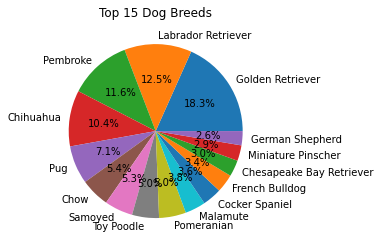

In [176]:
# Create a list of values for 15 most common dog breeds
top15 = dogs['predicted_breed'].value_counts().head(15)
values = top15.values
labels = top15.index

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Top 15 Dog Breeds')

